The dataset contains records of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases, the measurements were made after these treatments. It is a tab separated file (.csv) and contains the following columns:
* sbp - Systolic Blood Pressure
* tobacco - Cumulative tobacoo (kg)
* ldl - Low Density Lipoprotein Cholesterol
* adiposity
* famhist - Family history of heart disease (Present, Absent)
* typea - type-A behavior
* obesity
* alcohol - Current alcohol consumption
* age - Age at onset
* chd - Response, coronary heart disease

**Q1. Build a logistic regression model to predict the probability of getting chd (Coronary Heart Disease), that is, P (chd = 1). Use all other columns except chd as features to build the model.**

**Ans:-**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Reading and displaying few records of the data**

In [66]:
SAheart_df = pd.read_csv('SAheart.csv')
SAheart_df = SAheart_df.drop('row.names', axis=1)
SAheart_df.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


In [67]:
# Displaying total Information about the DataFrame
SAheart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [68]:
# Displaying the count of people having CHD and not having CHD
SAheart_df.chd.value_counts()

chd
0    302
1    160
Name: count, dtype: int64

The Output displays that there are 302 observations of people not having CHD and  160 observations of people having CHD.

In [69]:
X_features = list(SAheart_df.columns)
X_features.remove('chd')
X_features

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

**Encoding Categorical Features**

In [70]:
encoded_SAheart_df = pd.get_dummies(SAheart_df[X_features], drop_first=True, dtype='int64')
list(encoded_SAheart_df)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist_Present']

In [71]:
Y = SAheart_df.chd
X = sm.add_constant(encoded_SAheart_df)

**Splitting Dataset intro Training and Validation Sets**

We split the data into the ratio of 80:20 for the training set and validation set respectively.

In [72]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

**Building Logistic Regression Model**

In [73]:
logit = sm.Logit(train_y, train_X)
logit_lm = logit.fit()

Optimization terminated successfully.
         Current function value: 0.513971
         Iterations 6


So the above `logit_lm` is the required Logistic Regression Model

**Q2. Find out which features are statistically significant in the logistic regression model built in Question 1. Build a new logistic regression model using only the significant features.**

**Ans:-**

In [74]:
logit_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: chd              Pseudo R-squared: 0.199     
Date:               2025-06-04 23:16 AIC:              399.3110  
No. Observations:   369              BIC:              438.4189  
Df Model:           9                Log-Likelihood:   -189.66   
Df Residuals:       359              LL-Null:          -236.90   
Converged:          1.0000           LLR p-value:      2.0409e-16
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.1509   1.4664 -4.1945 0.0000 -9.0250 -3.2767
sbp                0.0081   0.0064  1.2623 0.2068 -0.0045  0.0206
tobacco            0.0563   0.0292  1.9263 0.0541 -0.0010  0.1135
ldl                0.1676   0.0645  2.5994 0.0093  0.0412  0.2940
adiposity          0.0273   0.0331  0.8227 0.4107 -0.0377  0.0922
typea              0.0411   0.0137  3.0048 0.0027  0.0143  0.0680
obesity           -0.0820   0.0494 -1.6610 0.0967 -0.1788  0.0148
alcohol            0.0019   0.0055  0.3440 0.7309 -0.0090  0.0128
age                0.0473   0.0134  3.5301 0.0004  0.0210  0.0736
famhist_Present    0.8135   0.2550  3.1906 0.0014  0.3138  1.3133
=================================================================

"""

**Model Diagonistics**

Here we check which features are statistically significant.

In [75]:
def get_significant_vars(lm):
    
    # Store the p-values and corresponding column names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    
    # Filter the column names where p-values if less than 0.05
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])


significant_vars = get_significant_vars(logit_lm)
significant_vars

['const', 'ldl', 'typea', 'age', 'famhist_Present']

So the features `ldl`, `typea`, `age`, `famhist_Present` are statistically significant in the logistic regression model.

Now we create a new model which only will have the above features.

In [76]:
logit_lm_2 = sm.Logit(train_y, sm.add_constant(train_X[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.526509
         Iterations 6


In [77]:
logit_lm_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: chd              Pseudo R-squared: 0.180     
Date:               2025-06-04 23:16 AIC:              398.5637  
No. Observations:   369              BIC:              418.1176  
Df Model:           4                Log-Likelihood:   -194.28   
Df Residuals:       364              LL-Null:          -236.90   
Converged:          1.0000           LLR p-value:      1.3535e-17
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.6645   1.0241 -6.5076 0.0000 -8.6717 -4.6573
ldl                0.1510   0.0586  2.5775 0.0100  0.0362  0.2658
typea              0.0386   0.0134  2.8887 0.0039  0.0124  0.0649
age                0.0626   0.0106  5.9065 0.0000  0.0418  0.0833
famhist_Present    0.7573   0.2485  3.0475 0.0023  0.2702  1.2443
=================================================================

"""

So, `logit_lm_2` is the required model which uses only the significant features.

**Q3. From the logistic regression model parameters, determine which parameters affect the probability of `chd` positively and negatively.**

**Ans:-**

In [78]:
logit_lm_2.params

const             -6.664475
ldl                0.150999
typea              0.038649
age                0.062556
famhist_Present    0.757269
dtype: float64

From the above parameters we see, that `chd` is :-
1. Negatively affected by the constant term, although it is not a part of the original dataset so we can take it out of our considerations.
2. Positively affected by `ldl` i.e., Low Density Lipoprotein Cholesterol, `typea` i.e., type-A behavior, `age` i.e., Age at onset and `famhist_Present` i.e., Family history of heart disease(Present).

**Q4. Calculate Youden's index for all possible cut-off probabilities ranging from 0.1 to 0.5 with an interval of 0.01. Find the optimal cut-off where Youden's index is maximum.**

**Ans:-**

For this part first we will first predict on our test data and draw the ROC curve along with it.

In [79]:
Y_pred_df = pd.DataFrame({"actual": test_y, "predicted_prob": logit_lm_2.predict(sm.add_constant(test_X[significant_vars]))})
Y_pred_df.sample(10, random_state=42)

,actual,predicted_prob
324,0,0.371330
278,0,0.028547
227,1,0.228640
291,0,0.066927
225,0,0.257000
172,0,0.248384
79,0,0.408029
19,1,0.613853
453,1,0.441454
185,1,0.253054


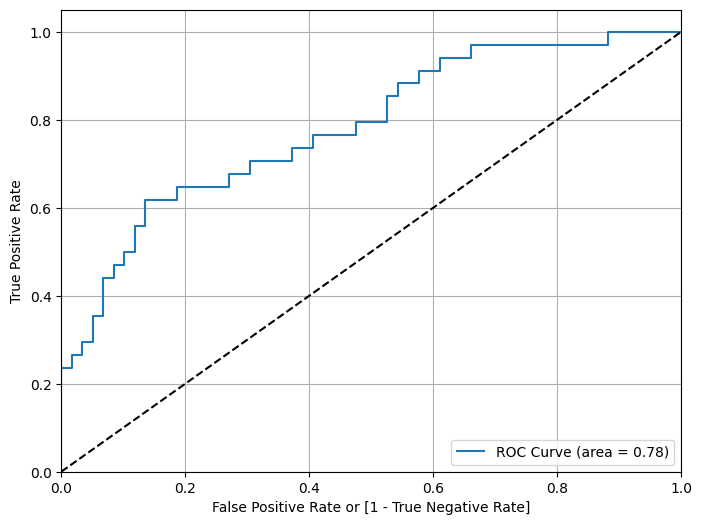

In [80]:
from sklearn import metrics
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 6))
   
    # Plot the fpr and tpr values for different threshold values
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
    
    # Draw a diagonal line connecting the origin and top right most point
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Setting x and y labels
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc(Y_pred_df.actual, Y_pred_df.predicted_prob)

Now we get the Youden's Index as required in the question.

In [81]:
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values('diff', ascending=False)[0:5]

,tpr,fpr,thresholds,diff
29,0.617647,0.135593,0.441454,0.482054
30,0.617647,0.152542,0.408029,0.465105
33,0.647059,0.186441,0.379718,0.460618
28,0.588235,0.135593,0.444642,0.452642
31,0.617647,0.169492,0.391934,0.448156


So from the above DataFrame we see that for Youden's Index is maximum at `diff` = 0.482054 and for it the `thresholds` = 0.441454. So the **Optimal cut-off** based on the maximum Youden's Index is **0.44**.

**Q5. Build a confusion matrix based on the cut-off probability found in Question 4 and report the precision and recall of the model for chd cases (i.e., chd = 1).**

**Ans:-**

So using the Optimal Cut-Off Probability we first get the predicted values.

In [83]:
Y_pred_df['predicted'] = Y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.44 else 0)
Y_pred_df

,actual,predicted_prob,predicted
225,0,0.257000,0
30,1,0.217227,0
39,1,0.817131,1
222,0,0.523576,1
124,0,0.237860,0
...,...,...,...
22,0,0.641116,1
358,0,0.309249,0
46,1,0.815421,1
168,0,0.125514,0


Now we build the Confusion Matrix

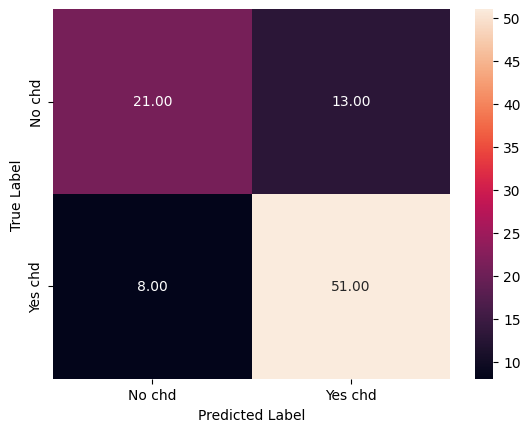

In [84]:
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, labels=[1, 0])
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels=["No chd", "Yes chd"], yticklabels=["No chd", "Yes chd"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


draw_cm(Y_pred_df.actual, Y_pred_df.predicted)

Now we get the Precision and recall values.

In [85]:
print(metrics.classification_report(Y_pred_df.actual, Y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        59
           1       0.72      0.62      0.67        34

    accuracy                           0.77        93
   macro avg       0.76      0.74      0.75        93
weighted avg       0.77      0.77      0.77        93



For `chd` cases (i.e., `chd` = 1), the Precision = 0.72 and Recall = 0.62.

**Q6. Find optimal cut-off probability using cost-based approach using the cost of FPs and FNs defined below**
* **Cost of predicting "chd" as "No chd" (FNs) cases is 5 times more than predicting "No chd" as "chd" (FPs).**

**Then find the precision and recall of the model for chd = 1.**

**Ans:-**

In [86]:
def get_total_cost(actual, predicted, cost_FP, cost_FN):
    # Correct way to pass the labels argument
    cm = metrics.confusion_matrix(actual, predicted, labels=[1, 0])
    cm_mat = np.array(cm)
    
    # False positives = cm[1, 0], False negatives = cm[0, 1]
    return cm_mat[0, 1] * cost_FN + cm_mat[1, 0] * cost_FP

Now here we have that cost of FNs is 5 times more than cost of FPs.

In [87]:
cost_df = pd.DataFrame(columns = ['prob', 'cost'])
idx = 0

# Iterate cut-off probability values between 0.10 and 0.49
for each_prob in range(10, 50):
    
    # Calculate the cost for the current threshold
    cost = get_total_cost(
        Y_pred_df.actual, 
        Y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob / 100) else 0),
        1, 5
    )
    
    # Append the result
    cost_df.loc[idx] = [(each_prob / 100), cost]
    idx += 1

# Sort by cost and show top 5 thresholds
cost_df.sort_values('cost').head()

,prob,cost
3,0.13,45.0
4,0.14,45.0
6,0.16,47.0
2,0.12,48.0
0,0.10,49.0


So the lowest cost is achieved at Cut-Off Probability of 0.13.

Hence using the cost-based approach the Optimal Cut-Off Probability is 0.13

Now we build the Confusion Matrix for this and then get the precision and recall values.

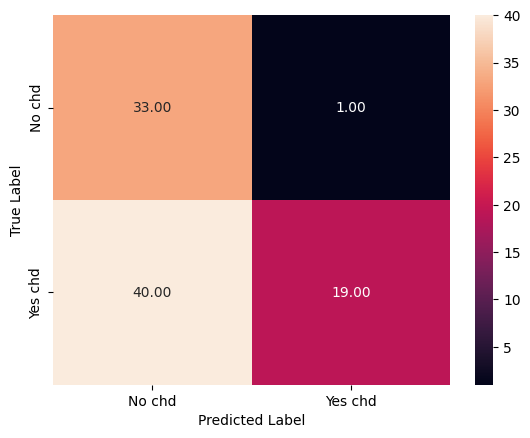

In [88]:
Y_pred_df['predicted_using_cost'] = Y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.13 else 0)

draw_cm(Y_pred_df.actual, Y_pred_df.predicted_using_cost)

In [89]:
print(metrics.classification_report(Y_pred_df.actual, Y_pred_df.predicted_using_cost))

              precision    recall  f1-score   support

           0       0.95      0.32      0.48        59
           1       0.45      0.97      0.62        34

    accuracy                           0.56        93
   macro avg       0.70      0.65      0.55        93
weighted avg       0.77      0.56      0.53        93



So for `chd` = 1, the Precision is 0.45 and Recall is 0.97.

**Q7. Build a decision tree classifier to predict the probability of using Gini index and max depth as 4.**

**Ans:-**

**Building Decision Tree Classifier using Gini Criteria**

In [114]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4)

So the `clf_tree` is the required Decision Tree.

**Q8. Compare the decision tree classifier and the logistic regression model performance. Explain which accuracy score can be used to find out which model is better in classifying *chd* from *no chd* cases.**

**Ans:-**

**Measuring Test Accuracy**

In [115]:
tree_predict = clf_tree.predict(test_X)
metrics.roc_auc_score(test_y, tree_predict)

np.float64(0.6567796610169492)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        90
           1       0.53      0.35      0.42        49

    accuracy                           0.66       139
   macro avg       0.62      0.59      0.59       139
weighted avg       0.64      0.66      0.64       139



**Best Overall Model (Balanced):**
Logistic Regression (cutoff = 0.44) :

* Highest accuracy (0.77)

* Best F1-score (0.67), meaning it balances precision and recall well

* Strong precision (0.72) and good recall (0.62)

**Best for Catching CHD Cases (High Recall):**
Logistic Regression (cutoff = 0.13):

* Recall = 0.97, almost all CHD cases detected

* But low precision (many false positives) and lower accuracy

**Decision Tree Model:**
* Performs better than cost-based logistic in accuracy (0.64 vs 0.56)

* But worse in:
  * Recall for CHD = 1 (0.35)
  * F 1-score (0.40)


* Implies it's missing many CHD cases, which is risky in medical prediction tasks

**Q9. Plot the decision tree and find out the most important splitting criteria at the top node. Explain how the Gini index is derived at the top node of the decision tree classifer.**

**Ans:-**

**Displaying the tree**

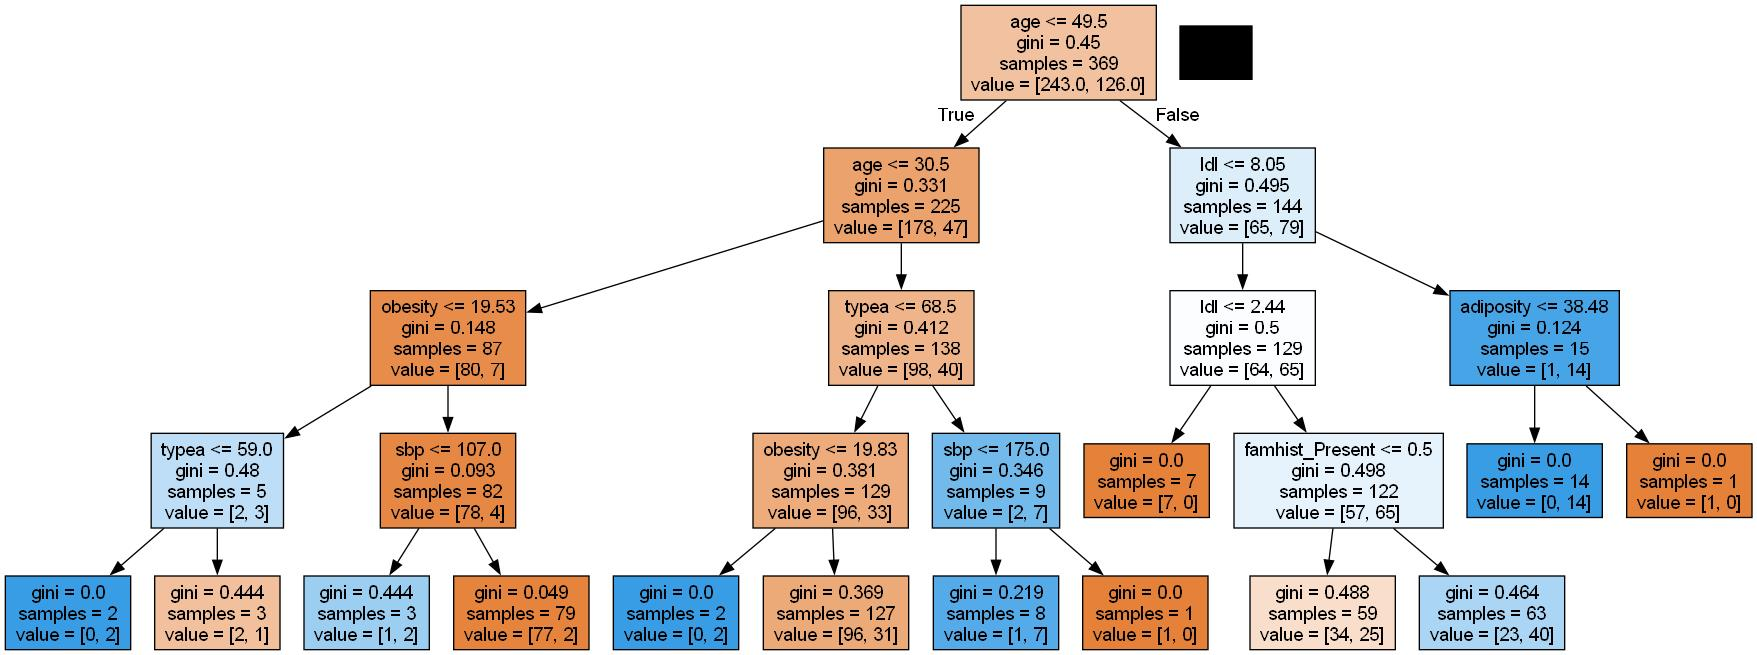

In [117]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz(clf_tree, out_file="chd_tree1.odt", feature_names=train_X.columns, filled=True)

# Read and create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree1.odt')
chd_tree_graph.write_jpg('chd_tree1.png')

# Render the png file
Image(filename='chd_tree1.png')

Based on the decision tree, the most important splitting criteria at the top node is age <= 49.5.

The Gini Index at the top node is derived as :-

In [118]:
gini_node_1 = 1 - pow(140/168, 2) - pow(28/168, 2)
print(round(gini_node_1, 4))

0.2778


**Q10. Find the optimal max_depth for decision tree classifier if Gini index is used as splitting criteria. Search possible depths ranging from 3 to 10 and use ROC and AUC as scoring to find the optimal max_depth.**

**Ans:-**

**Finding Maximum Depth**

In [119]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10)}]

clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree, tuned_parameters, cv=10, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [120]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 2}

So the Optimal max_depth for decision tree classifier if Ginni index is used as splitting criteria is 2.

Searching possible depths ranging from 3 to 10 .

In [1]:
from sklearn.metrics import roc_auc_score
# Store AUCs for different depths
depths = list(range(3, 11))
auc_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt.fit(train_X, train_y)
    y_pred_proba = dt.predict_proba(test_X)[:, 1]
    
    auc = roc_auc_score(test_y, y_pred_proba)
    auc_scores.append(auc)
    print(f"Depth: {depth}, AUC: {auc:.4f}")

# Plot AUC vs Depth
plt.figure(figsize=(8, 5))
plt.plot(depths, auc_scores, marker='o', linestyle='-')
plt.title("AUC Score vs max_depth (Decision Tree, Gini)")
plt.xlabel("max_depth")
plt.ylabel("ROC-AUC Score")
plt.grid(True)
plt.show()

NameError: name 'DecisionTreeClassifier' is not defined

**EXTRAS**

In [122]:
Y_predTree_df = pd.DataFrame({"actual": test_y, "predicted_prob": tree_predict})

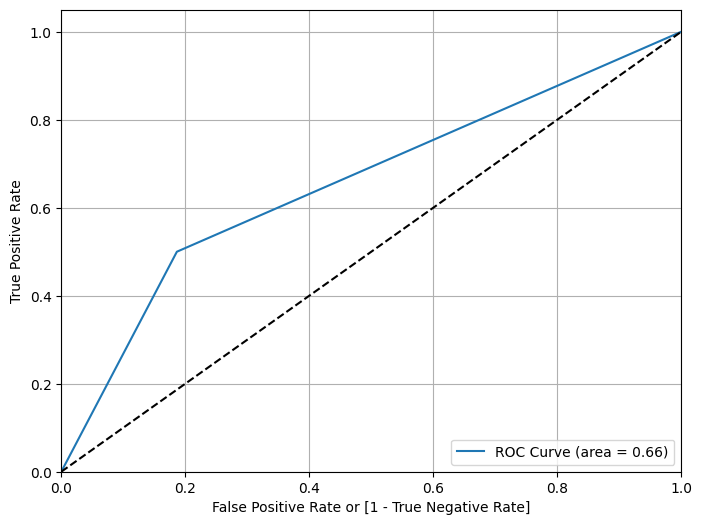

In [125]:
fpr2, tpr2, thresholds2 = draw_roc(Y_predTree_df.actual, Y_predTree_df.predicted_prob)